In [2]:
import os
import pandas as pd

from datetime import datetime
import seaborn as sns


In [3]:
path = '../data/'
train_sessions = pd.read_csv(path+'train_sessions.csv')
train_purchases = pd.read_csv(path+"train_purchases.csv")
item_features = pd.read_csv(path+'item_features.csv')


# session

In [4]:
train_sessions.head()


,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211


8060     14714
26853    13192
2447      9774
1644      6955
19882     6947
         ...  
22553        1
10263        1
24857        1
6163         1
23168        1
Name: item_id, Length: 23496, dtype: int64


/home/Shu/miniconda3/envs/torch/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item_id', ylabel='Density'>

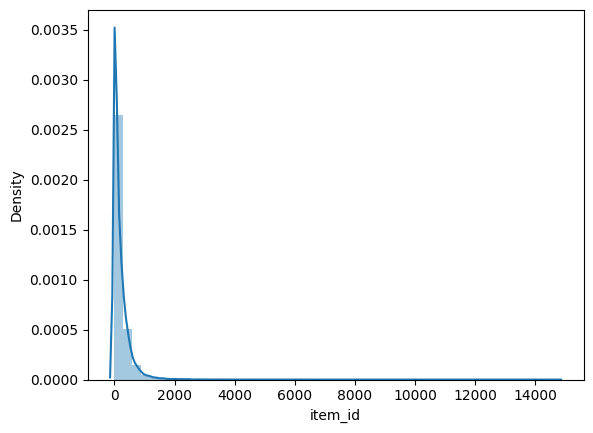

In [13]:
item_map = train_sessions["item_id"].value_counts()
print(item_map)
sns.distplot(item_map)


In [10]:
len(item_map[item_map>1000]) / len(item_map)


0.023323118828736805

In [11]:
session_map = train_sessions['session_id'].value_counts()
session_map


3852385    100
305141     100
3067101    100
3715268    100
913190     100
          ... 
2059210      1
1874868      1
1854382      1
1850272      1
3772208      1
Name: session_id, Length: 1000000, dtype: int64

/home/Shu/miniconda3/envs/torch/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='session_id', ylabel='Density'>

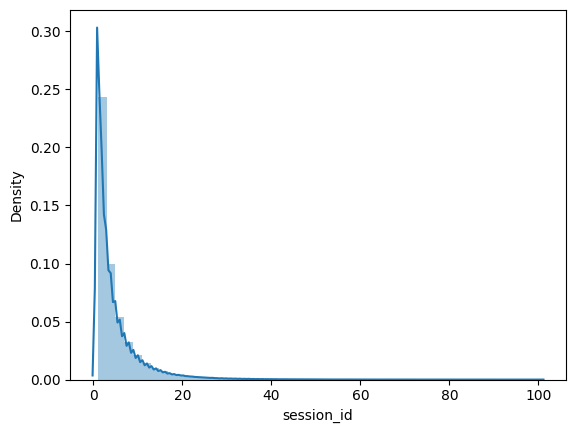

In [14]:
sns.distplot(session_map)


# Purchase


In [15]:
train_purchases.head()


,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114


/home/Shu/miniconda3/envs/torch/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item_id', ylabel='Density'>

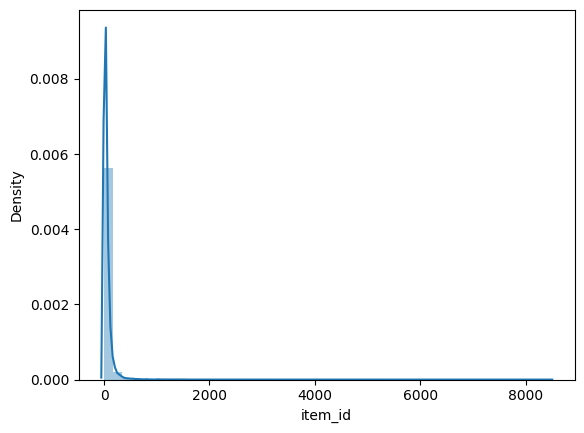

In [20]:
purchase_count = train_purchases['item_id'].value_counts()
purchase_count
sns.distplot(purchase_count)


In [24]:
rate_list = []
for thre in range(1,21):
    rate_list.append(len(session_map[session_map<=thre])/len(session_map))


In [26]:
session_count = pd.DataFrame()
session_count['thre'] = [x for x in range(1,21)]
session_count['rate'] = rate_list
session_count


,thre,rate
0,1,0.307698
1,2,0.482473
2,3,0.597972
3,4,0.680278
4,5,0.740973
5,6,0.787326
6,7,0.823314
7,8,0.852140
8,9,0.875183
9,10,0.894147


# item features

In [32]:
item_features.head()


,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75


In [33]:

item_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471751 entries, 0 to 471750
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   item_id              471751 non-null  int64
 1   feature_category_id  471751 non-null  int64
 2   feature_value_id     471751 non-null  int64
dtypes: int64(3)
memory usage: 10.8 MB


In [27]:
item_features["feature_category_id"].nunique()


73

In [28]:
item_features['feature_category_id'].value_counts()


56    23691
47    23691
50    23077
68    23038
61    22512
      ...  
52      568
54      341
13      137
9       137
27        1
Name: feature_category_id, Length: 73, dtype: int64

In [31]:
item_features['item_id'].nunique()   # 物品个数


23691

# ItemCF

## 构建共现矩阵

23618个物品  1000000个session  由于没有用户信息，只好一个session当一个用户

In [103]:
test_sessions = pd.read_csv(path+"test_leaderboard_sessions.csv")


In [37]:
train_sessions = train_sessions.append(train_purchases)


In [43]:
user_item_dict = train_sessions.groupby('session_id')['item_id'].agg(list).to_dict()
user_item_dict


{3: [9655, 9655, 15085],
 13: [15654, 18626],
 18: [18316, 2507, 4026, 24911],
 19: [25772,
  6341,
  25555,
  20033,
  8281,
  8268,
  4385,
  6704,
  8316,
  27638,
  8813,
  19896,
  27937,
  23687,
  12804,
  1755,
  18936,
  12534],
 24: [2927, 11662, 2927, 28075, 434, 16064, 10414, 18539, 18476, 13226],
 28: [11529, 11529, 16895, 21902, 26394],
 31: [25972, 16289, 2069, 27579, 26457, 2069, 4230, 264, 8345],
 36: [26536, 25417, 14532],
 42: [10395, 20523, 17472, 22492, 11784],
 44: [22747, 17089, 4028],
 48: [8398, 26404, 24022],
 49: [21358, 2011],
 52: [24636, 12047, 12556],
 75: [5409, 28057],
 77: [13214, 13214, 3173, 7935, 24315, 4243],
 107: [19062, 20147, 27477, 4016],
 108: [5434,
  26130,
  2536,
  22860,
  25964,
  4816,
  24454,
  2925,
  11843,
  11386,
  7159,
  11256,
  25896,
  382,
  12735,
  13222,
  5747,
  2995,
  13885,
  12735,
  11386,
  4867,
  27499,
  12735,
  25086,
  15237,
  15421,
  18532],
 113: [2171, 17218, 15738, 19760, 21215, 6187, 21107],
 115: [

In [53]:
from collections import defaultdict
import math

sim_item = {}

item_cnt = defaultdict(int)


defaultdict(int, {'123': 1})

In [ ]:
user_item_dict


In [62]:

# user其实就是session
for user,items in user_item_dict.items():
    for item in items:
        item_cnt[item] += 1
        sim_item.setdefault(item,{})
        for relate_item in items:
            if relate_item==item:
                continue
            sim_item[item].setdefault(relate_item,0)
            # 给长度过长的session 降低权重
            sim_item[item][relate_item] += 1/math.log(1+len(items))


In [ ]:
sns.distplot([len(i) for i in user_item_dict.values()])


共现矩阵

In [82]:
from tqdm import tqdm

sim_item_corr = sim_item.copy()

for i,relate_items in tqdm(sim_item.items()):
    for j,cij in relate_items.items():
        sim_item_corr[i][j] = cij / math.sqrt(item_cnt[i]*item_cnt[j])


100%|██████████| 23618/23618 [00:10<00:00, 2310.07it/s]


计算100个热门商品 用作padding

In [101]:
order = train_sessions['item_id'].value_counts()[:100]
popular_items = order.index[:100]
popular_items 


Int64Index([ 8060, 26853,  2447, 19882,  8622,  1644, 17089, 18156, 11742,
             7963, 20770,  4028, 23088,  9184,  2072,  4193,  6736, 19912,
            21616,  2915, 21215, 27225, 24921,  7640, 26691, 17239, 27613,
            15501, 18657, 27555,  2814,  8861, 12179,  1018, 14392,   972,
             4130, 27852,  2173, 20236, 12251, 23789, 14550, 13922, 10390,
            26249, 19150, 21781,  4917, 27151, 26301, 22704,  2855,  1368,
            22607, 16922, 15249,  9427, 12540, 18981, 16064, 13596,  7792,
            21668, 21890, 15140, 27556, 23451,  2098, 20629, 18723, 11053,
            11923, 16660, 13409,  7999, 15738, 14378, 24243,  8755, 14306,
            11565, 25415, 17740,  9522,  7096, 14927,  7367, 27442, 13081,
              434, 22886, 17648, 22747,  5367, 17431, 12959, 21152, 21423,
             2188],
           dtype='int64')

In [107]:
test_sessions_dict = test_sessions.groupby('session_id')['item_id'].agg(list).to_dict()
test_sessions_dict


{26: [19185],
 200: [17089, 17089, 8060, 4758],
 205: [8194],
 495: [6853],
 521: [26471],
 587: [22204],
 721: [13914],
 810: [11028, 6491, 11028, 11028, 24118, 21528, 3835, 3835],
 886: [23345],
 1178: [15862, 2915, 23864, 2915],
 1208: [26060, 13363, 11693],
 1267: [16200],
 1304: [15566, 19960, 8242, 27773, 6056, 21138, 14108],
 1549: [11693],
 1592: [23252,
  14725,
  1368,
  27613,
  4130,
  4758,
  22695,
  22695,
  4758,
  4130,
  4758,
  4758,
  10163,
  27613,
  4130,
  6182,
  1368],
 1658: [9046,
  20028,
  12068,
  8036,
  8036,
  10997,
  10997,
  10997,
  10997,
  8036,
  7455,
  7455,
  6491,
  8029,
  27672],
 1725: [6315, 6315, 21594],
 1749: [27096, 21575, 24948, 5064, 5579, 23345, 26982],
 1912: [26846],
 1994: [17949, 17949],
 1998: [6916, 9468, 24630, 14136],
 2044: [5320, 21778, 15449, 14865, 16338, 26499, 9925, 26548],
 2075: [10250],
 2298: [13642, 3857, 21215, 21098],
 2334: [13004,
  107,
  13363,
  11693,
  13243,
  2325,
  18511,
  6625,
  25031,
  18511,
 

In [140]:
# 取出一个session的item列表
import random


random_session_id = random.choice(list(test_sessions_dict.keys()))

session_items_list = test_sessions_dict[random_session_id]
# rank 是对一个session来说
rank = defaultdict(int)
for i in session_items_list:
    if i in sim_item_corr.keys():  
        for j, score_ij in sorted(sim_item_corr[i].items(),key = lambda x:x[1],reverse=True)[:20]:
            rank[j] += score_ij

# 推荐与这个session 里的物品相似度之和最高的K个物品
K = 5
res = sorted(rank.items(),key = lambda x:x[1],reverse=True)[:K]
res = [r[0] for r in res]
if len(res)<K:
    res.extend(popular_items[:K])
    res = list(set(res))
    res = res[:K]
print("为session  {} 推荐 {}".format(random_session_id,res))


为session  2129628 推荐 [19768, 27746, 12657, 399, 2378]
